# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.isnull().sum()

,0
lat,0
lng,0
desc,0
zip,12855
title,0
timeStamp,0
twp,43
addr,519
e,0


In [6]:
df['zip'].fillna(df['zip'].mode()[0],inplace=True)
df['twp'].fillna(df['twp'].mode()[0],inplace=True)
df['addr'].fillna(df['addr'].mode()[0],inplace=True)

/tmp/ipython-input-2244806190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna(df['zip'].mode()[0],inplace=True)
/tmp/ipython-input-2244806190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [7]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,19834
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


In [8]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,8486
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [9]:
df['title'].nunique()

110

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason']

,reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


## Data Loading and Preparation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('911.csv')

df.info()
df.head()
df.isnull().sum()

df['zip'].fillna(df['zip'].mode()[0],inplace=True)
df['twp'].fillna(df['twp'].mode()[0],inplace=True)
df['addr'].fillna(df['addr'].mode()[0],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


/tmp/ipython-input-3859636036.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna(df['zip'].mode()[0],inplace=True)
/tmp/ipython-input-3859636036.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## Analyzing Call Reasons

<Axes: xlabel='reason', ylabel='count'>

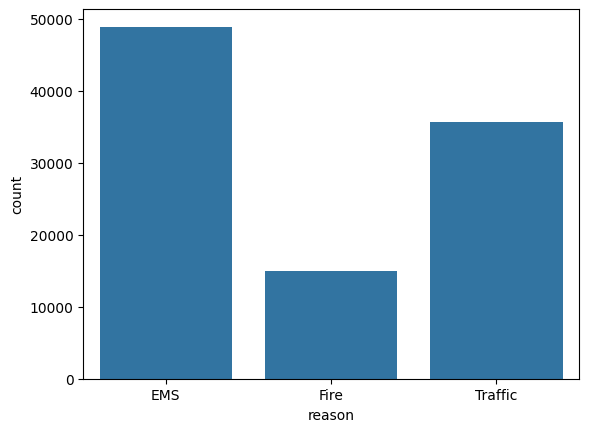

In [12]:
df['zip'].value_counts().head(5)
df['twp'].value_counts().head(5)
df['title'].nunique()

df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason'].value_counts()

sns.countplot(x='reason',data=df)

## Time-based Analysis

In [13]:
type(df['timeStamp'].iloc[0])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

time = df['timeStamp'].iloc[0]
time.hour

df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
dmap = ({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
df['day of week'] = df['day of week'].map(dmap)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


## Visualizing Time-based Data

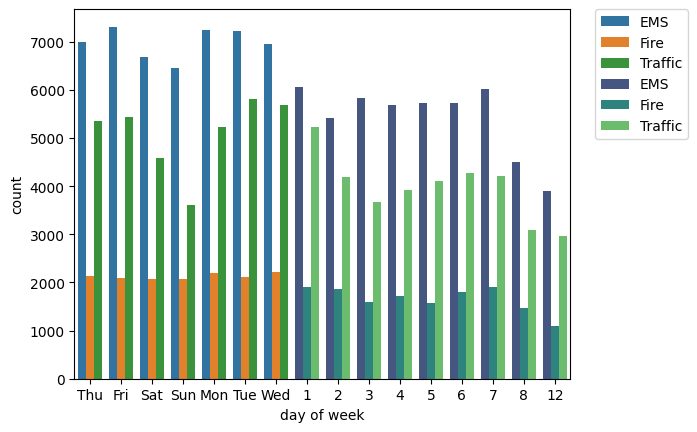

In [14]:
sns.countplot(x='day of week', data=df, hue='reason')
sns.countplot(x='month',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

## Analyzing Calls per Month and Date

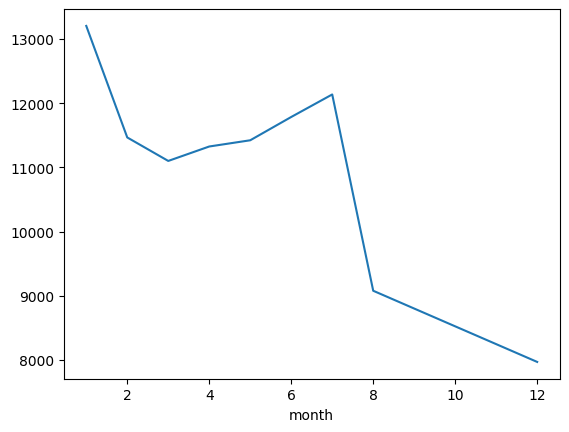

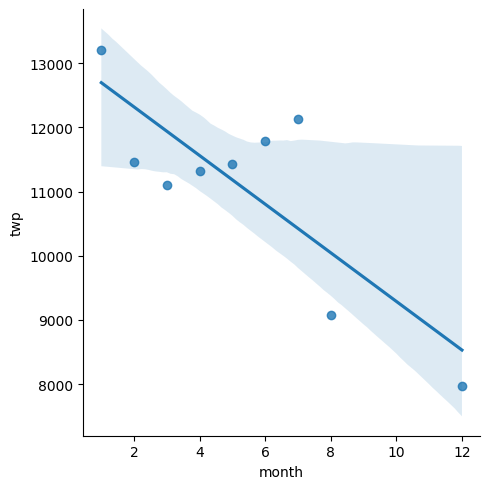

In [15]:
byMonth = df.groupby('month').count()
byMonth.head()
byMonth['lat'].plot()

sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

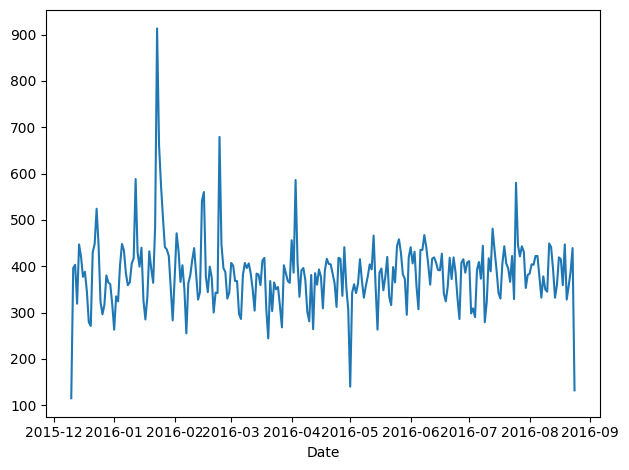

In [16]:
df['Date']=df['timeStamp'].apply(lambda time: time.date())
df['Date'].head()

byDate = df.groupby('Date').count()
byDate['lat'].plot()
plt.tight_layout()

## Analyzing Specific Call Reasons Over Time

Text(0.5, 1.0, 'EMS')

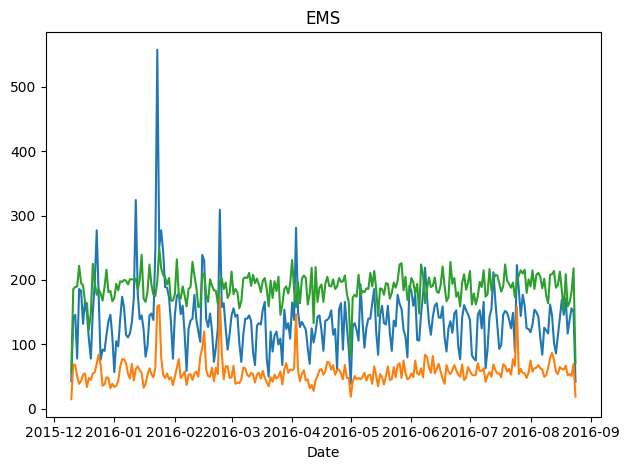

In [17]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

## Heatmaps and Clustermaps

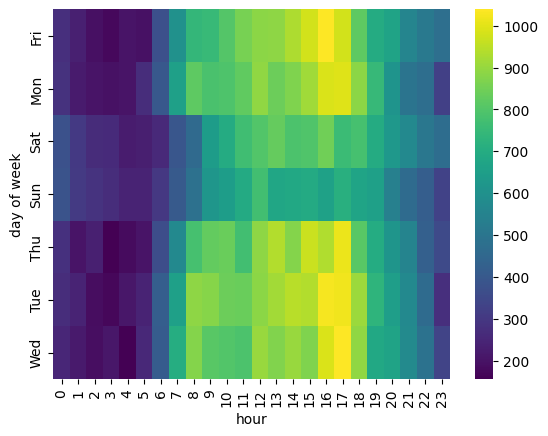

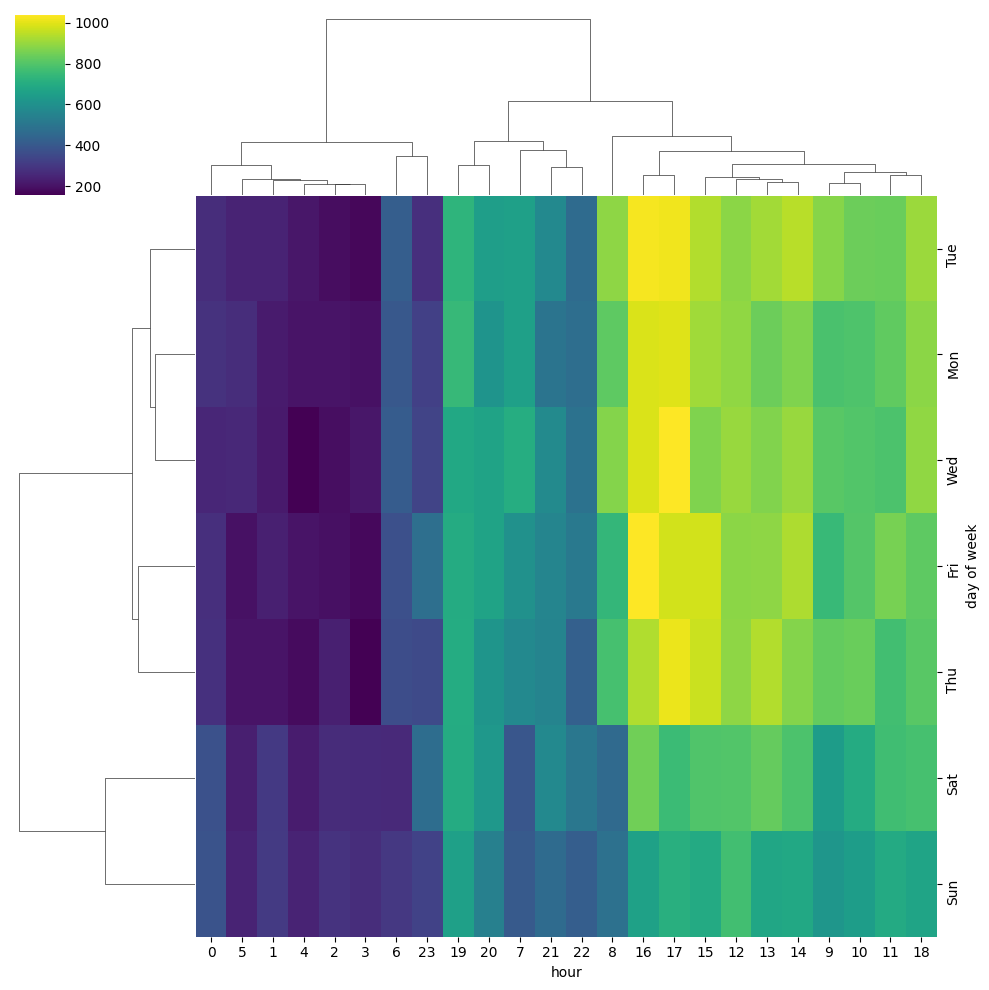

In [18]:
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour.head()

sns.heatmap(dayHour,cmap='viridis')
sns.clustermap(dayHour,cmap='viridis')

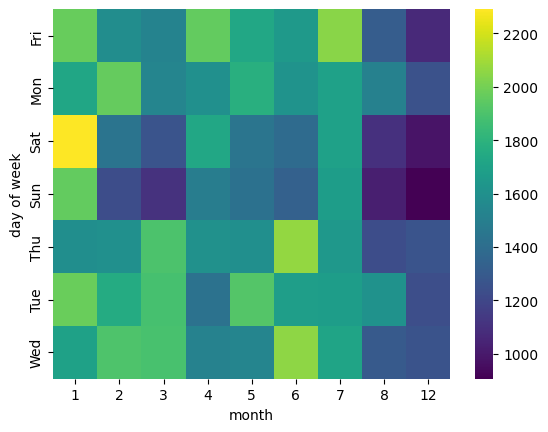

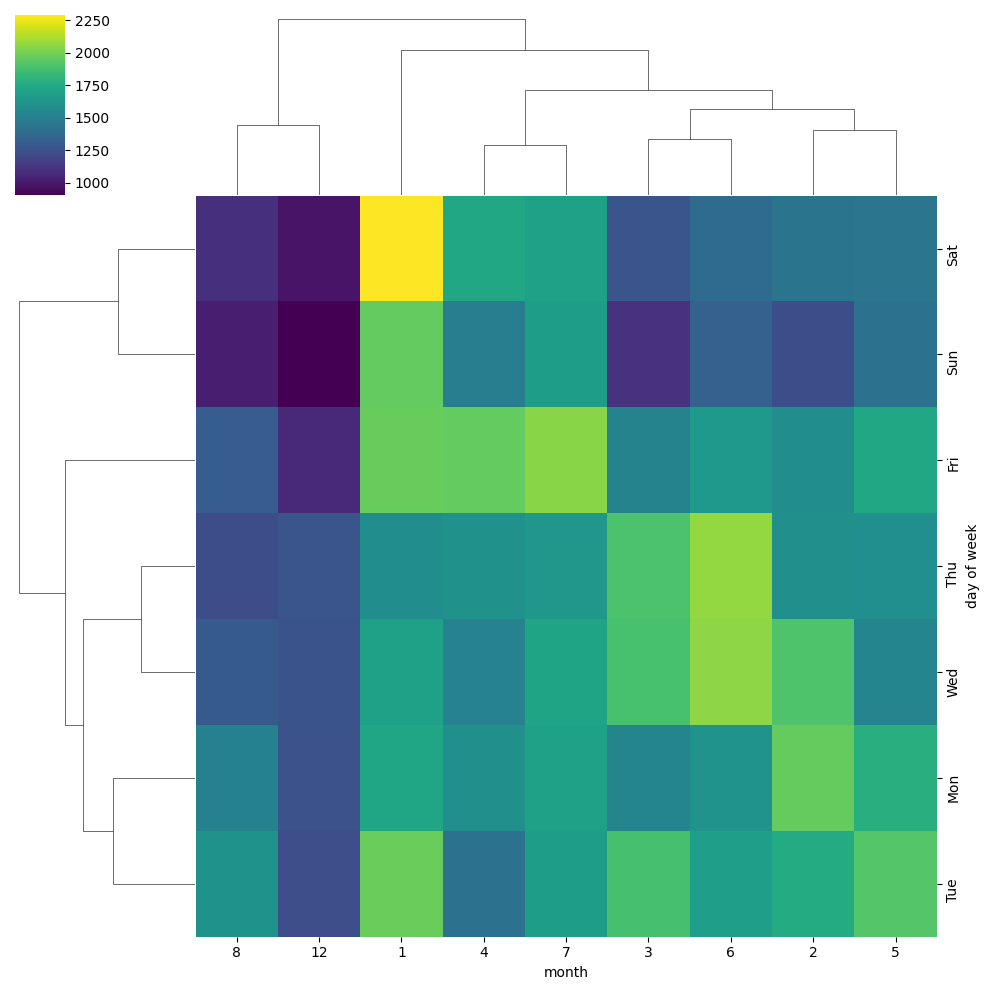

In [19]:
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth.head()

sns.heatmap(dayMonth,cmap='viridis')
sns.clustermap(dayMonth,cmap='viridis')

In [20]:
df['reason'].value_counts()

,count
reason,
EMS,48877
Traffic,35695
Fire,14920


<Axes: xlabel='reason', ylabel='count'>

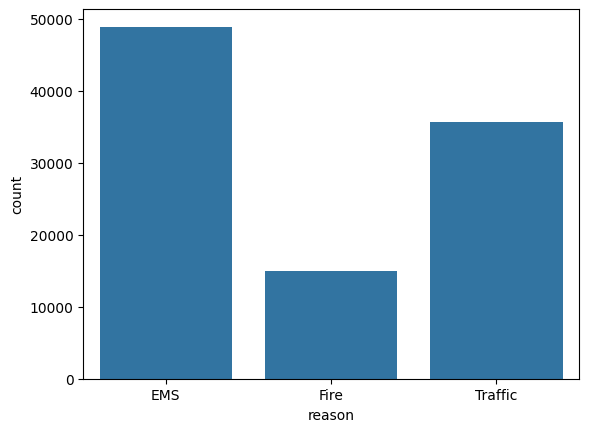

In [21]:
sns.countplot(x='reason',data=df)

In [22]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [26]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
dmap = ({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
df['day of week'] = df['day of week'].map(dmap)


In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<Axes: xlabel='day of week', ylabel='count'>

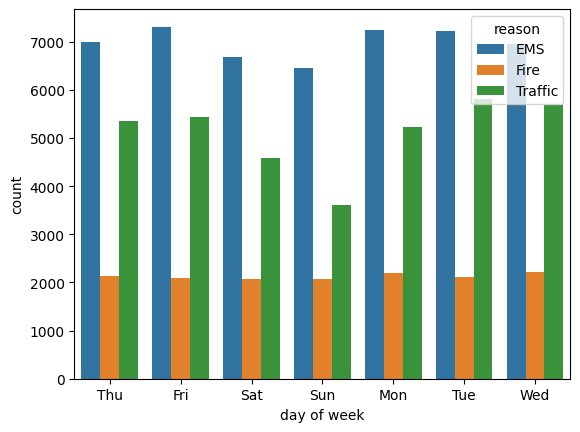

In [28]:
sns.countplot(x='day of week', data=df, hue='reason')


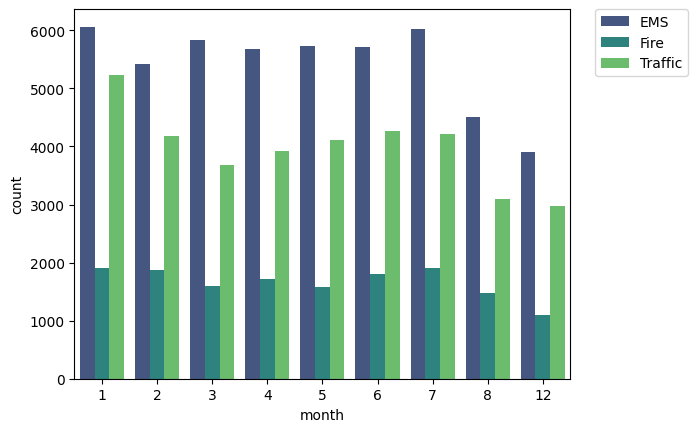

In [29]:
sns.countplot(x='month',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [30]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week,Date
month,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='month'>

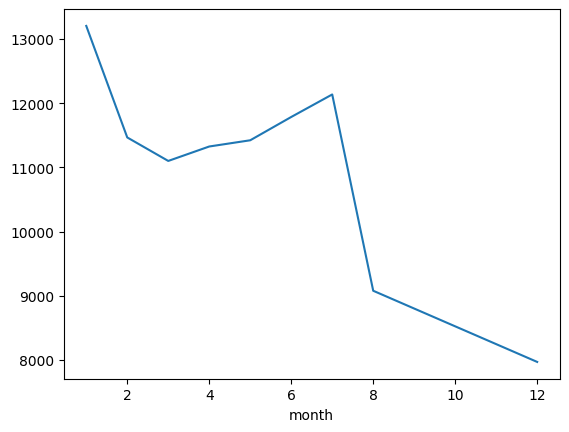

In [31]:
byMonth['lat'].plot()

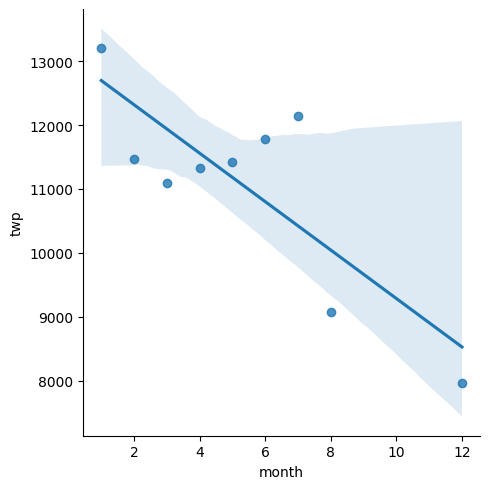

In [32]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [33]:
df['Date']=df['timeStamp'].apply(lambda time: time.date())
df['Date'].head()

,Date
0,2015-12-10
1,2015-12-10
2,2015-12-10
3,2015-12-10
4,2015-12-10


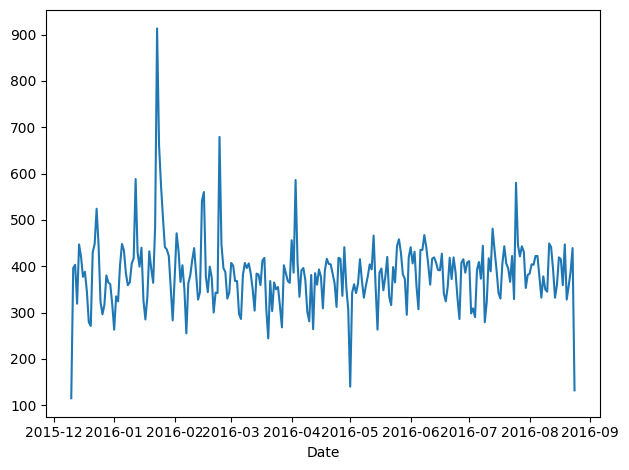

In [34]:
byDate = df.groupby('Date').count()
byDate['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

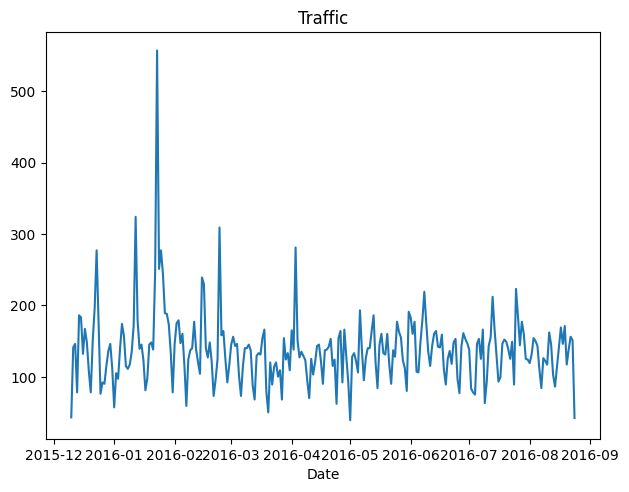

In [35]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

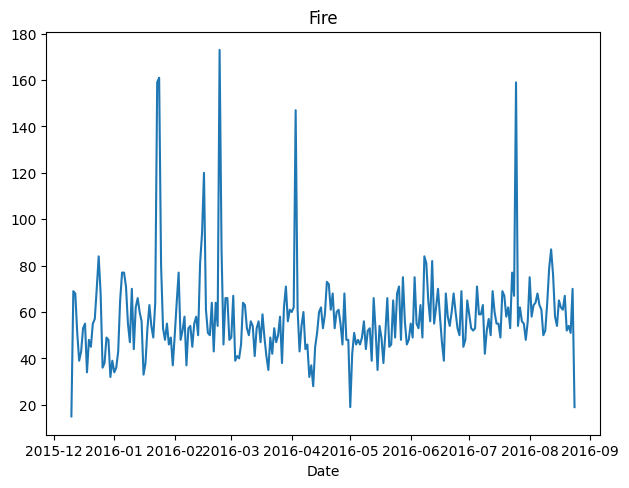

In [36]:
df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

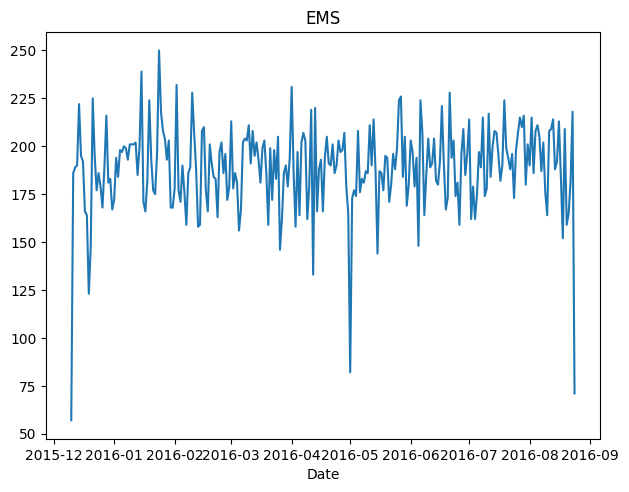

In [37]:
df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

In [38]:
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='hour', ylabel='day of week'>

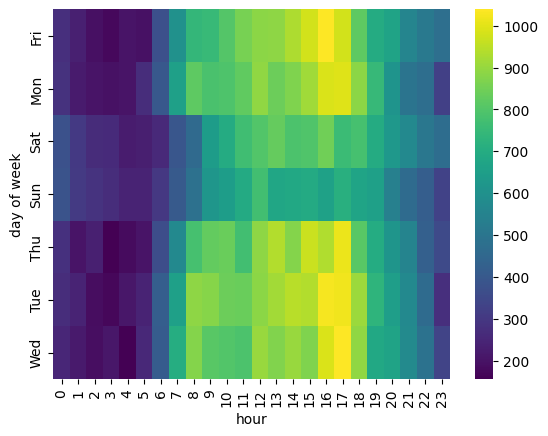

In [39]:
sns.heatmap(dayHour,cmap='viridis')

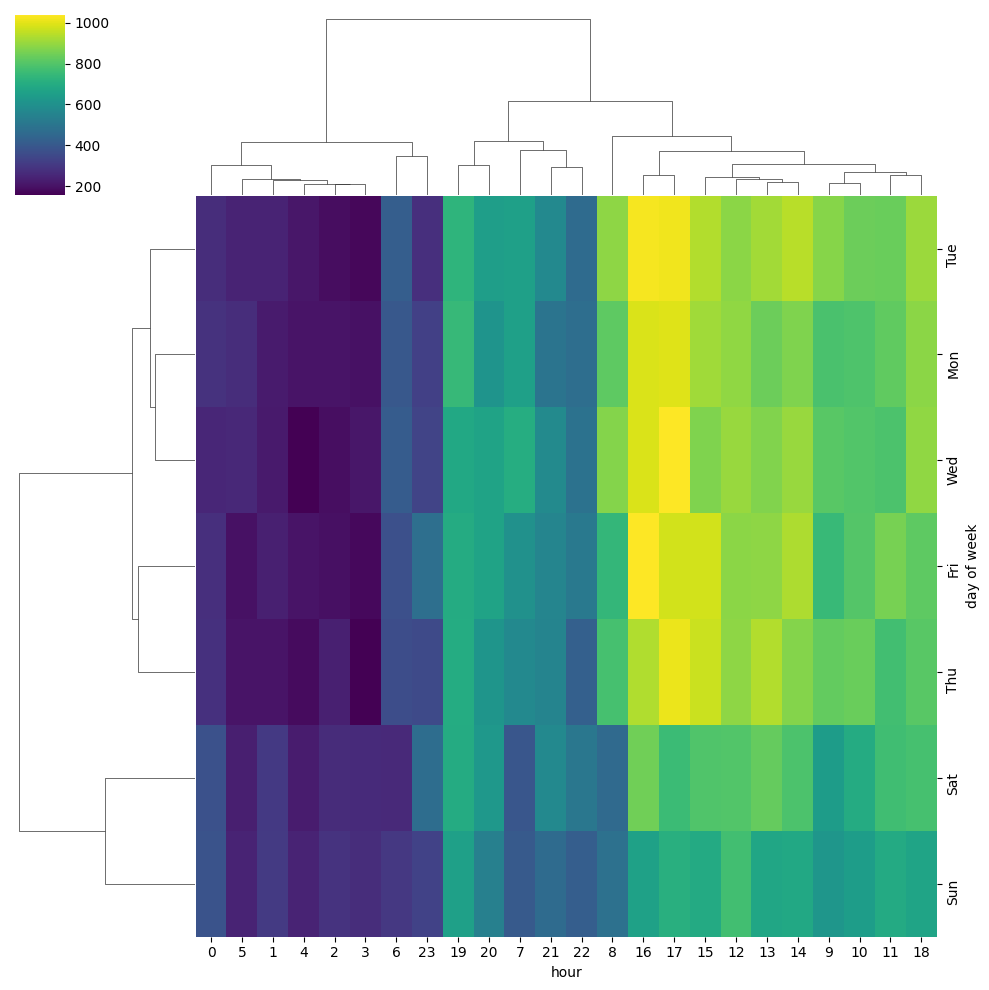

In [40]:
sns.clustermap(dayHour,cmap='viridis')

In [41]:
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='month', ylabel='day of week'>

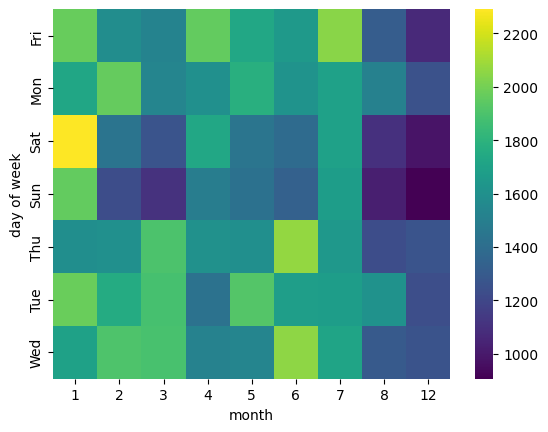

In [42]:
sns.heatmap(dayMonth,cmap='viridis')

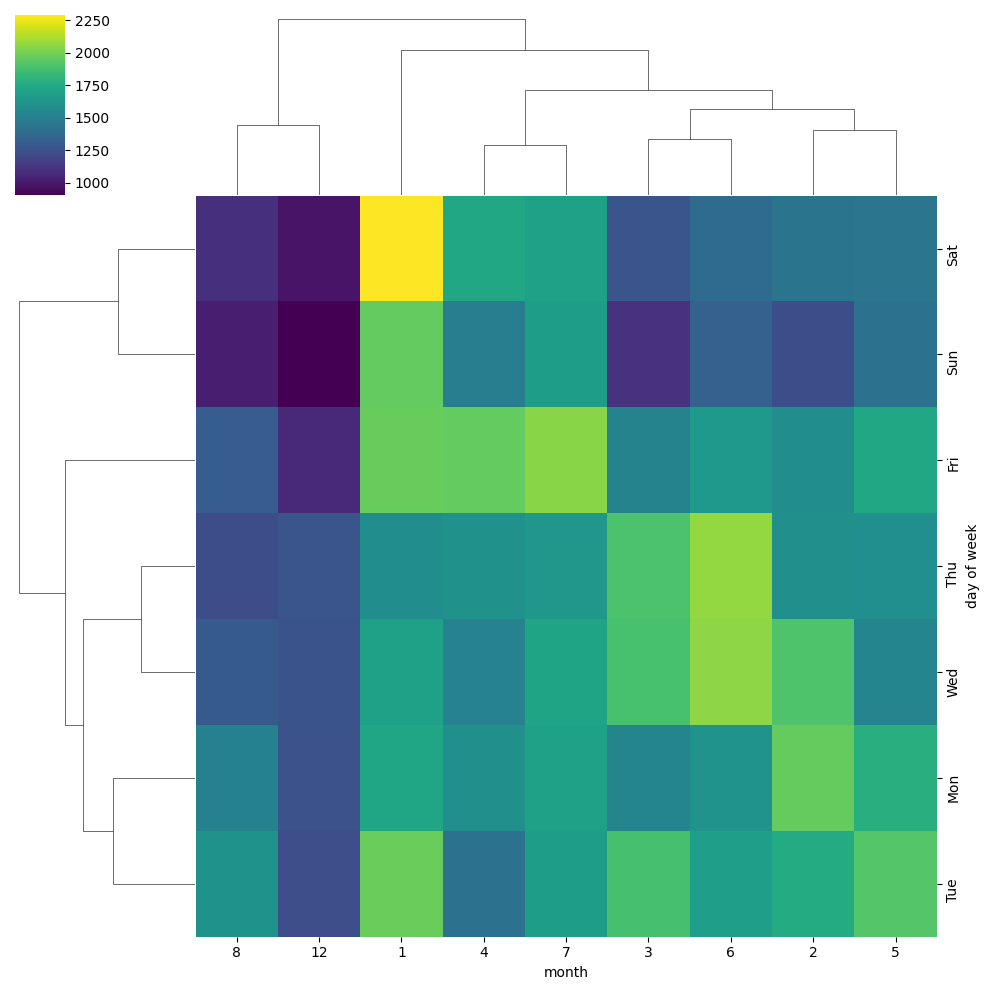

In [43]:
sns.clustermap(dayMonth,cmap='viridis')